In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC, SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus
from IPython.core.display import Image
from sklearn import metrics
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import os
import warnings

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [2]:
os.chdir('./Data')
warnings.filterwarnings('ignore')

NameError: name 'os' is not defined

In [21]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data_xgb = data
data_xgb = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
data_xgb[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']] = data_xgb[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']].astype(object)

In [5]:
data_xgb_use = pd.get_dummies(data_xgb)
data_xgb_use.head()

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.363625,0.805833,0.160446,985,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0.363478,0.353739,0.696087,0.248539,801,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0.196364,0.189405,0.437273,0.248309,1349,1,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,0.200000,0.212122,0.590435,0.160296,1562,1,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
4,0.226957,0.229270,0.436957,0.186900,1600,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0


In [6]:
X = data_xgb_use.drop('cnt', axis=1)
y = data_xgb_use[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
clf = XGBRegressor(n_estimators=100, max_depth=4, subsample=0.9, learning_rate=0.3)
clf.fit(X_train, y_train)
y_test_pre= clf.predict(X_test)
print("Score : %f" % metrics.r2_score(y_test, y_test_pre))

Score : 0.921801


In [8]:
MAPE = np.mean(abs(y_test.reset_index(drop=True) - pd.DataFrame(y_test_pre, columns=['cnt'])) / y_test.reset_index(drop=True))
print('MAPE:', MAPE)

MAPE: cnt    0.105639
dtype: float64


In [9]:
data_xgb_use['cnt_pre_xgb'] = clf.predict(X)
data_white_tree = data_xgb_use[['temp', 'atemp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_0', 'holiday_1', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'cnt', 'cnt_pre_xgb']]
X_white_tree = data_white_tree.drop(['cnt', 'cnt_pre_xgb'], axis=1)
y_white_tree = data_white_tree[['cnt_pre_xgb']]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_white_tree, y_white_tree, test_size=0.2, random_state=101)
white_tree = DecisionTreeRegressor(max_depth=3)
white_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [11]:
y_test_pre = white_tree.predict(X_test)

In [12]:
print("Score : %f" % metrics.r2_score(y_test, white_tree.predict(X_test)))

Score : 0.843742


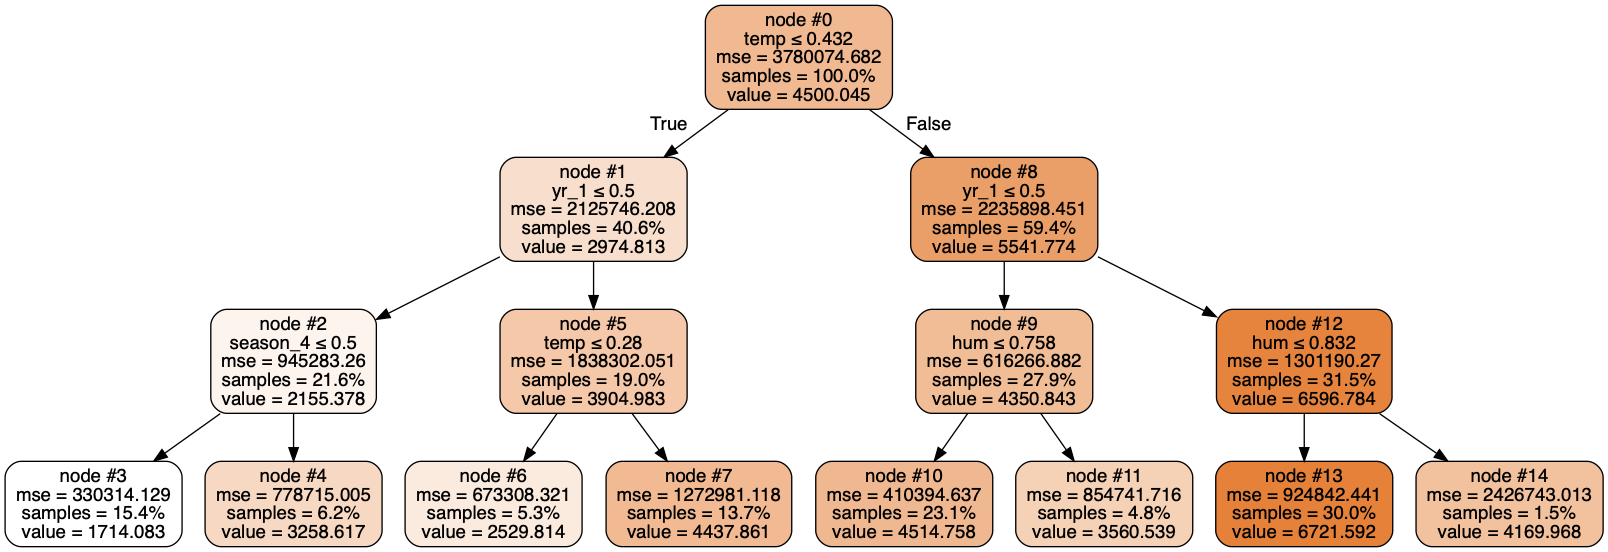

In [13]:
dot_data = StringIO()
tree.export_graphviz(white_tree, out_file=dot_data, feature_names=X_white_tree.columns,
                     filled=True, rounded=True, proportion=True,
                     special_characters=True, node_ids=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [17]:
data_white_tree['sight'] = white_tree.apply(X_white_tree)
data_white_tree['sight'] = data_white_tree['sight'].astype(object)
data_white_tree.head()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,cnt,cnt_pre_xgb,sight
0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,1,0,...,0,1,1,0,0,1,0,985,1022.703247,3
1,0.363478,0.353739,0.696087,0.248539,1,0,0,0,1,0,...,0,0,1,0,0,1,0,801,936.644653,3
2,0.196364,0.189405,0.437273,0.248309,1,0,0,0,1,0,...,0,0,0,1,1,0,0,1349,1345.484375,3
3,0.200000,0.212122,0.590435,0.160296,1,0,0,0,1,0,...,0,0,0,1,1,0,0,1562,1521.909424,3
4,0.226957,0.229270,0.436957,0.186900,1,0,0,0,1,0,...,0,0,0,1,1,0,0,1600,1578.997314,3


In [25]:
data_ols = data
data_ols['sight'] = white_tree.apply(X_white_tree)
data_ols = data_ols[['yr', 'temp', 'hum', 'sight', 'cnt']]
data_ols[['yr', 'sight']] = data_ols[['yr', 'sight']].astype(object)
data_ols_use = pd.get_dummies(data_ols, drop_first=True)
data_ols_use.head()

,temp,hum,cnt,yr_1,sight_4,sight_6,sight_7,sight_10,sight_11,sight_13,sight_14
0,0.344167,0.805833,985,0,0,0,0,0,0,0,0
1,0.363478,0.696087,801,0,0,0,0,0,0,0,0
2,0.196364,0.437273,1349,0,0,0,0,0,0,0,0
3,0.200000,0.590435,1562,0,0,0,0,0,0,0,0
4,0.226957,0.436957,1600,0,0,0,0,0,0,0,0


In [26]:
model_sight_ols = ols('cnt ~ temp + hum + yr_1 + sight_4 + sight_6 + sight_7 + sight_10 + \
                      sight_11 + sight_13 + sight_14', data=data_ols_use)
est_sight_ols = model_sight_ols.fit()
print(est_sight_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     327.4
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          7.77e-248
Time:                        23:21:16   Log-Likelihood:                -5975.2
No. Observations:                 731   AIC:                         1.197e+04
Df Residuals:                     721   BIC:                         1.202e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1980.1327    193.134     10.253      0.0